# Array Paradigm

## Initial Set-Up

In [1]:
import numpy as np


## Predecessor and Successor

In [2]:
def predecessor(a: int) -> int:
    return np.add(a, -1)


assert predecessor(1) == 0
assert predecessor(10) == 9


In [3]:
def successor(a: int) -> int:
    return np.add(a, 1)


assert successor(0) == 1
assert successor(10) == 11


## Addition

In [4]:
def addition(addend_1: int, addend_2: int) -> int:
    return np.add(addend_1, addend_2)


assert addition(0, 0) == 0
assert addition(1, 0) == 1
assert addition(0, 1) == 1
assert addition(10, 10) == 20


## Multiplication

In [5]:
def multiplication(multiplicand: int, multiplier: int) -> int:
    return np.multiply(multiplicand, multiplier)


assert multiplication(0, 0) == 0
assert multiplication(2, 0) == 0
assert multiplication(0, 2) == 0
assert multiplication(10, 10) == 100


## Exponentiation

In [6]:
def exponentiation(base: int, exponent: int) -> float:
    return np.power(base, exponent)


assert exponentiation(1, 0) == 1
assert exponentiation(0, 1) == 0
assert exponentiation(3, 3) == 27


## What is the particularity of the Array Paradigm?

In [7]:
from typing import List
import matplotlib.pyplot as plt
import matplotlib as mpl
import perfplot
import pandas as pd
import seaborn as sns


Y_TICKS = [10**k for k in range(-6, 3)]
Y_TICKS_LABELS = [
    "1 µs",
    "10 µs",
    "100 µs",
    "1 ms",
    "10 ms",
    "100 ms",
    "1 s",
    "10 s",
    "100 s",
]

assert len(Y_TICKS) == len(Y_TICKS_LABELS)


def plot_results(data, differences):
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.style.use("bmh")
    plt.rcParams["figure.figsize"] = 16, 9

    fig, axes = plt.subplots(2, 1)

    ax = axes[0]
    sns.lineplot(x="x", y="values", hue="label", data=data, ax=ax)

    ax.set_xlabel("Array Size")
    ax.set_xticks(data["x"])
    ax.set_xscale("log", base=10)

    ax.set_ylabel("Execution Time")
    ax.set_yscale("log", base=10)
    ax.set_yticks(Y_TICKS)
    ax.set_yticklabels(Y_TICKS_LABELS)

    ax.legend(loc="lower right")

    ax = axes[1]
    sns.lineplot(x="x", y="values", data=differences, ax=ax)

    ax.set_xlabel("Array Size")
    ax.set_xticks(data["x"])
    ax.set_xscale("log", base=10)

    ax.set_ylabel("Pure Python's speed relative to Numpy [%]")

    plt.tight_layout()
    plt.show()


def compute_differences(data):
    return (
        data.groupby("x")
            .agg({"values": lambda x: (x[0] / x[1]) * 100 })
            .reset_index()
    )


def run_benchmark(setup, kernels, n_range):
    perfplot_params = dict(
        setup=setup,
        kernels=kernels,
        labels=["Pure Python", "Numpy"],
        n_range=n_range,
        xlabel="Array Size",
    )

    data_dicts = []

    out = perfplot.bench(**perfplot_params)

    for t, label in zip(out.timings_s, out.labels):
        data = {"x": out.n_range, "values": t, "label": [label] * len(out.n_range)}
        data_dicts.append(data)

    return pd.DataFrame(data_dicts).explode(["x", "values", "label"])


In [8]:
def multiplication_pure_python(
    multiplicands: List[int], multipliers: List[int]
) -> List[int]:
    return [
        multiplicand * multiplier
        for multiplicand, multiplier in zip(multiplicands, multipliers)
    ]


In [9]:
setup = lambda n: np.random.rand(2, n).tolist()

kernels = [
    lambda x: multiplication_pure_python(x[0], x[1]),
    lambda x: multiplication(x[0], x[1]),
]

n_range = [2**k for k in range(1, 28)]

df_multiplication = run_benchmark(setup, kernels, n_range)
relative_difference_multiplication = compute_differences(df_multiplication)


Output()

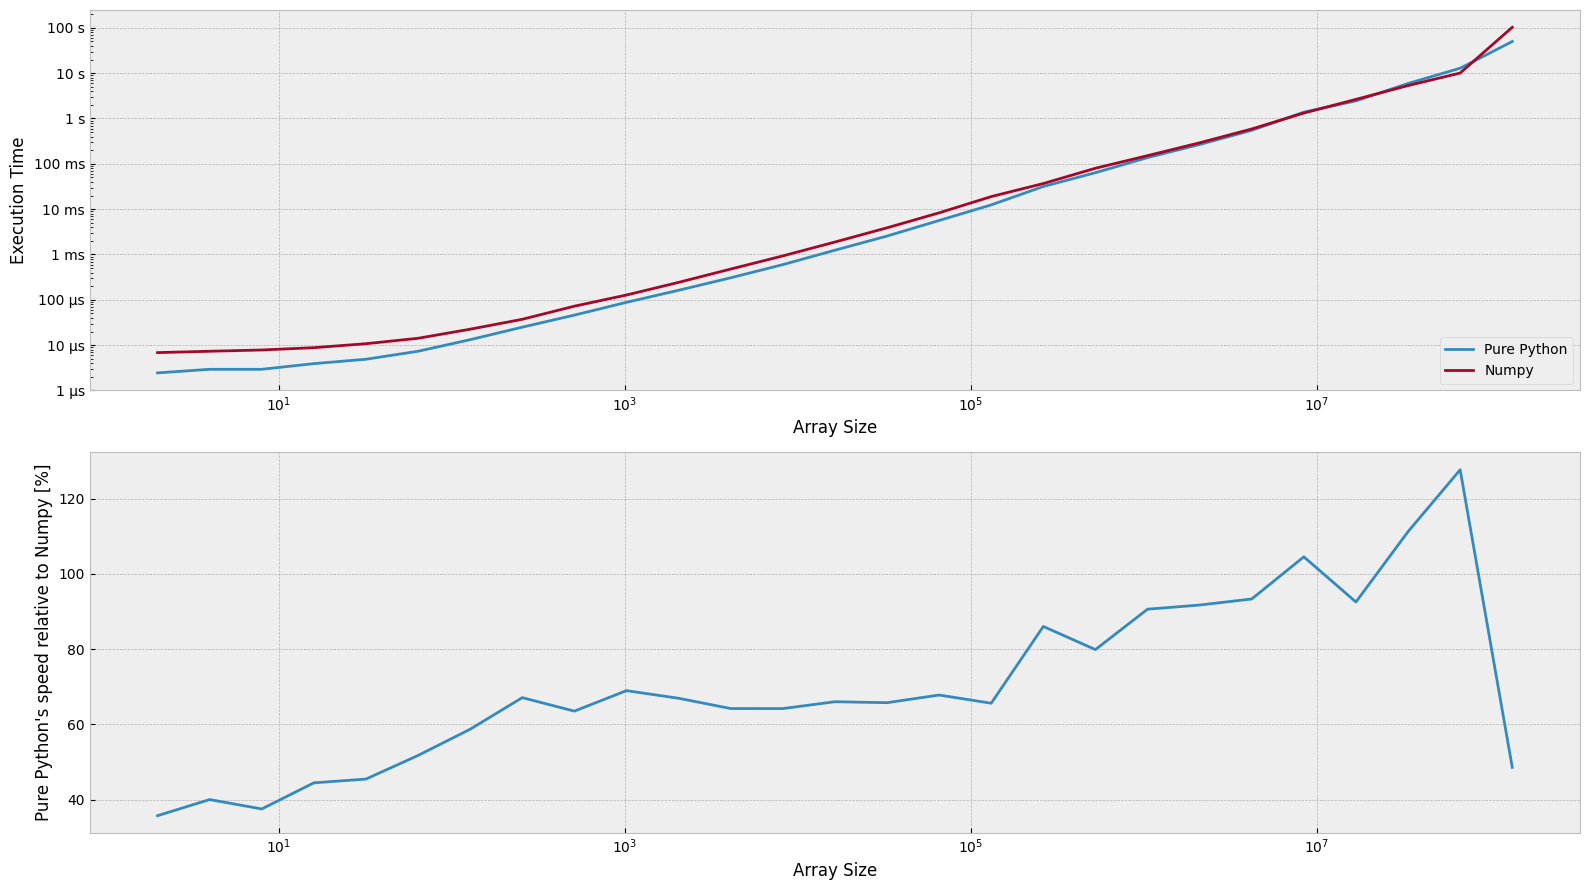

In [10]:
plot_results(df_multiplication, relative_difference_multiplication)


In [11]:
def matrix_multiplication(m1: List[List[int]], m2: List[List[int]]) -> np.ndarray:
    return np.matmul(m1, m2)


def matrix_multiplication_pure_python(
    m1: List[List[int]], m2: List[List[int]]
) -> List[List[int]]:
    # From https://stackoverflow.com/a/54379048/7690767
    return [
        [sum(x * y for x, y in zip(m1_r, m2_c)) for m2_c in zip(*m2)] for m1_r in m1
    ]


In [12]:
setup = lambda n: np.random.rand(2, n, n).tolist()

kernels = [
    lambda x: matrix_multiplication_pure_python(x[0], x[1]),
    lambda x: matrix_multiplication(x[0], x[1]),
]

n_range = [2**k for k in range(1, 11)]

df_matrix_product = run_benchmark(setup, kernels, n_range)
relative_difference_matrix_product = compute_differences(df_matrix_product)


Output()

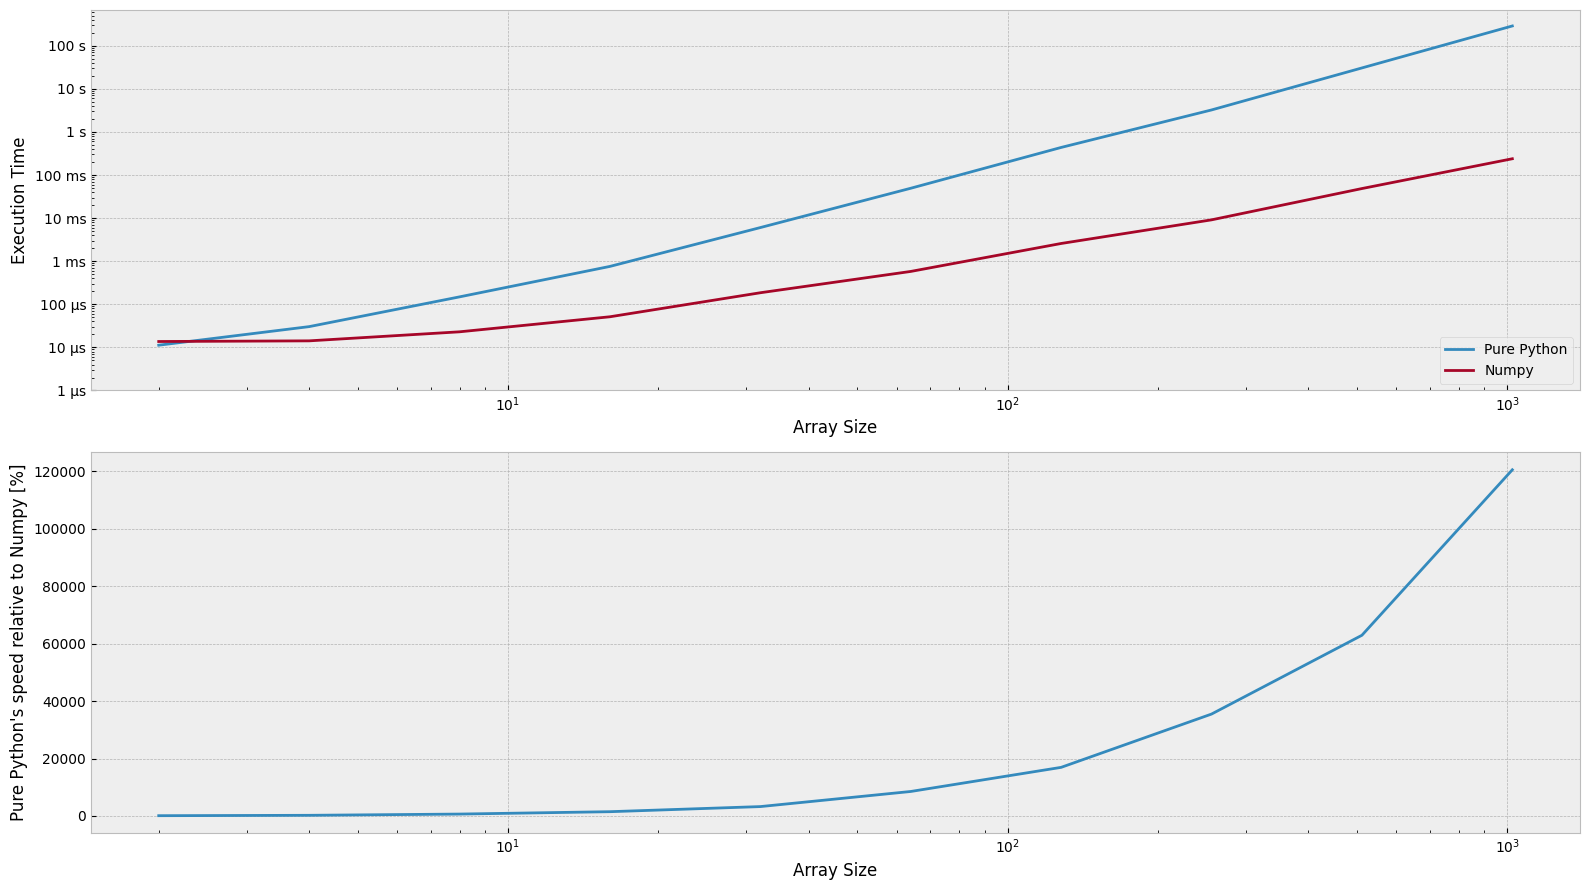

In [13]:
plot_results(df_matrix_product, relative_difference_matrix_product)
